In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from datetime import datetime
from functools import reduce
from collections import Counter
import functions
from scipy.stats import ks_2samp
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.mode.chained_assignment = None

# Load the dataset
we load our dataset and using the function **parsedate** we have changed the format of our timestamp

In [2]:
dataset = pd.read_csv('steam_reviews.csv',
                      index_col=0,
                      parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'],
                      date_parser=functions.parsedate)

C:\Users\Clara\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
dataset.head(20)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",2021-01-23 05:21:04,2021-01-23 05:21:04,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,2021-01-23 05:20:01
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",2021-01-23 05:18:11,2021-01-23 05:18:11,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,2021-01-22 21:42:14
7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,2021-01-23 05:05:12,2021-01-23 05:05:12,True,0,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,2021-01-03 10:53:38
8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,2021-01-23 04:55:03,2021-01-23 04:55:03,True,0,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,2021-01-22 12:07:55
9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,2021-01-23 04:43:25,2021-01-23 04:43:25,True,0,0,...,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,2021-01-23 05:18:00


In [4]:
dataset.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [5]:
dataset.shape

(21747371, 22)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 

# RQ1

###  Exploratory Data Analysis (EDA)

To try to better understand our dataset we have made a bunch of plots and tables in which we have tried to catch some information about these reviews received for the applications in Steam.

In [7]:
dataset.describe()

,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07
mean,3.928181e+05,5.187500e+07,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03
std,2.480977e+05,2.084267e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04
min,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.427600e+05,3.639355e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02
50%,3.595500e+05,5.384058e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03
75%,5.780800e+05,6.928793e+07,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03
max,1.291340e+06,8.521867e+07,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06


#### Application more reviewed: 
To start our analysis we have made a pie chart about applications more reviewed. In particular we have decided to pick the first thirty games more reviewed and understand how the number of rewiews is splitted between them. Indeed the percentage written in the slices of the pie plot is referred not to the total number of reviews but the to the sum of reviews written for these thirty more popular games. The choice of thirty is due to make cleaner the plot and because we are interested only in the more popular games. The most talked-about.

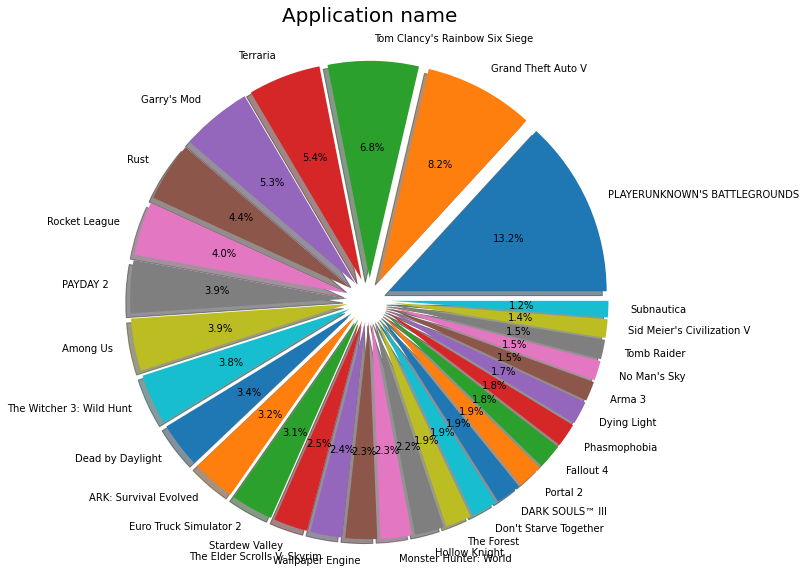

In [8]:
a = pd.Series(dataset.groupby("app_name").app_id.count().sort_values(ascending=False).head(30))
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(a,
        labels = a.index,
        explode = [0.1 for value in range(0, a.index.nunique())],
        shadow = True, autopct = '%.1f%%')
plt.title('Application name', fontsize = 20)
plt.axis('off')
plt.show()

#### Correlation matrix:
Then we have tried to make a correlation matrix to understand if there are some variables correlated between them 

<AxesSubplot:>

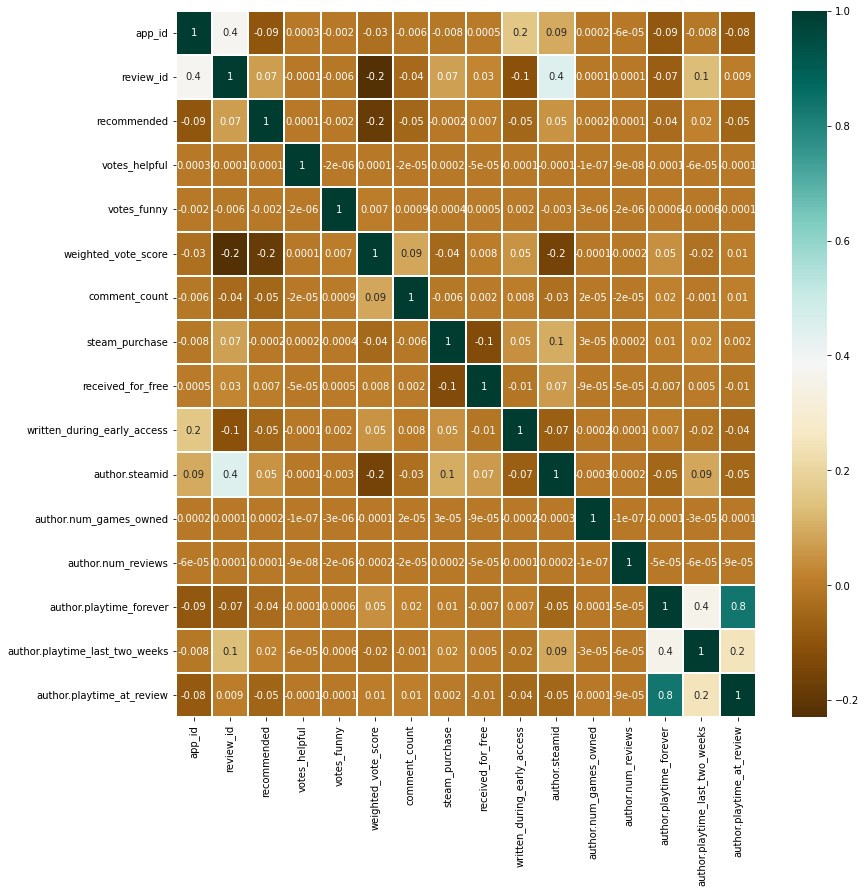

In [9]:
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(dataset.corr(), cbar=True, annot = True, cmap='BrBG', linewidths=.3,fmt='.1g')

We have noticed that there was not any particular correlation between columns except for the ones related to time played by the player therefore we have decided to see in depth these correlations to have clearer information about them. 

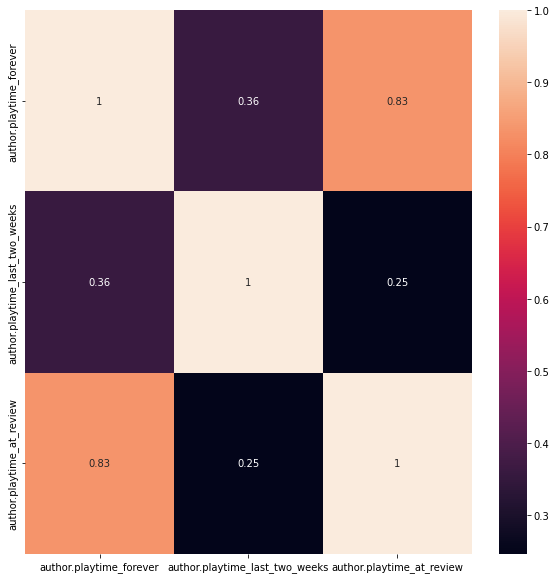

In [10]:
df = pd.DataFrame(dataset,columns=['author.playtime_forever','author.playtime_last_two_weeks',\
                                   'author.playtime_at_review'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


#### Time and Language:
At this point we want to extract some information about the language of the reviews and time when they were written. We have divided the day in three parts: morning (8am-2pm), afternoon (2pm-10pm) and night (10pm-8am). 
So for each part of the day we have grouped the reviews by language, counted them and picked the ten languages more popular.

In this way in our final barplot for each popular language we have the number of reviews written in each part of the day. We have also made a table to explain better the number obtained. 

In [11]:
arr_1 = dataset['timestamp_created'].dt.time

In [12]:
time_1 = [datetime.strptime('08:00:00', '%H:%M:%S').time(),
          datetime.strptime('13:59:59', '%H:%M:%S').time()]
index_1 = [x for x in arr_1.index if (time_1[0] <= arr_1[x] <= time_1[1])]

In [13]:
time_2 = [datetime.strptime('14:00:00', '%H:%M:%S').time(),
          datetime.strptime('21:59:59', '%H:%M:%S').time()]
index_2 = [x for x in arr_1.index if (time_2[0] <= arr_1[x] <= time_2[1])]

In [14]:
time_3 = [datetime.strptime('22:00:00', '%H:%M:%S').time(),
          datetime.strptime('23:59:59', '%H:%M:%S').time(),
          datetime.strptime('00:00:00', '%H:%M:%S').time(),
          datetime.strptime('07:59:59', '%H:%M:%S').time()]
index_3 = [x for x in arr_1.index
           if ((time_3[0] <= arr_1[x] <= time_3[1]) or
               (time_3[2] <= arr_1[x] <= time_3[3]))]

In [15]:
# counting occurrences in the languages
mat1 = Counter((dataset['language'][index_1]).tolist())
pom1 = Counter((dataset['language'][index_2]).tolist())
not1 = Counter((dataset['language'][index_3]).tolist())

In [16]:
# sorting the occurrences
mat2 = {k: v for k, v in sorted(mat1.items(), key=lambda item: item[1], reverse=True)}
pom2 = {k: v for k, v in sorted(pom1.items(), key=lambda item: item[1], reverse=True)}
not2 = {k: v for k, v in sorted(not1.items(), key=lambda item: item[1], reverse=True)}

In [17]:
# taking only the first 10 languages, that happens to be the same for every time slot
mattina = list(mat2.items())[:10]
pomeriggio = list(pom2.items())[:10]
notte = list(not2.items())[:10]

In [18]:
# creating an empty dataframe with timeslots as cols and languages as indexes
df = pd.DataFrame(index=list(mat2.keys())[:10], columns=['8am-2pm', '2pm-10pm', '10pm-8am'])

In [19]:
# adding the values in the dataframe
for (couple1, couple2, couple3) in zip(mattina, pomeriggio, notte):
    df['8am-2pm'][couple1[0]] = couple1[1]
    df['2pm-10pm'][couple2[0]] = couple2[1]
    df['10pm-8am'][couple3[0]] = couple3[1]

In [20]:
df.index.name = 'language'
df

,8am-2pm,2pm-10pm,10pm-8am
language,,,
english,1723581,3818056,4093800
schinese,1426672,916148,1422147
russian,777649,1099378,471873
koreana,238303,157217,218112
german,202319,418566,131711
turkish,188734,327833,119301
polish,148353,270651,76525
french,143964,281877,115910
spanish,107991,345728,359601


Text(0, 0.5, 'number reviews')

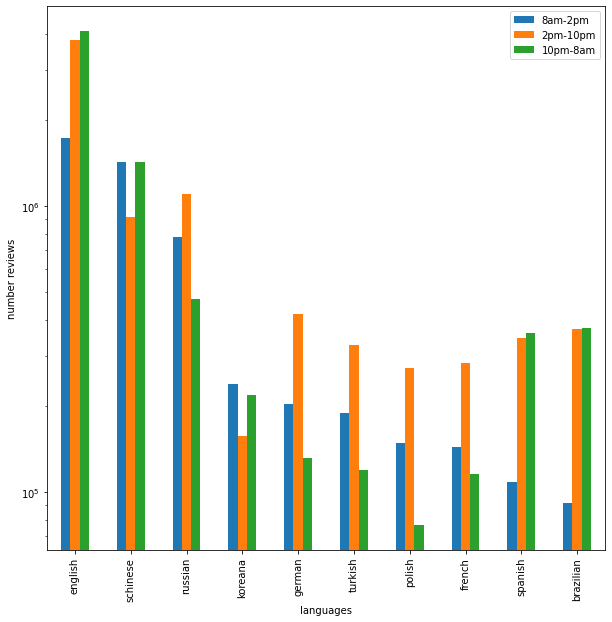

In [21]:
ax = df.plot(y=["8am-2pm", "2pm-10pm", "10pm-8am"], kind="bar")
ax.set_yscale('log')
ax.set_xlabel('languages')
ax.set_ylabel("number reviews")

In this stacked barplot we can see that the majority of the reviews are written during the afternoon while during the night fewer people usually write on Steam. The language more used as expected is English

#### Viral Comments:
In this table we have wanted to look at the ten reviews which have received more comments because we have thought that it could be interesting look at them to understand which comments are popular on Steam. 

In [22]:
dataset_7 = dataset.sort_values(by=['comment_count'], ascending = False)
dataset_7 = dataset_7.reset_index()

In [23]:
dataset_7[["author.steamid", "language", "app_name", "review", "comment_count"]].head(10)

,author.steamid,language,app_name,review,comment_count
0,76561198094505831,schinese,For Honor,辣鸡游戏,4893
1,76561198144481578,english,No Man's Sky,"Overhyped, poorly optimized, indie game made b...",1432
2,76561198348751745,schinese,PLAYERUNKNOWN'S BATTLEGROUNDS,蓝洞韩国杂总，国家就是一帮垃圾民族组成的狗杂种，这个垃圾民族就该死绝死光，杀绝种了，杂种民族...,1235
3,76561198301678331,schinese,NieR:Automata™,比全球首发版还贵…当中国人傻钱多么？\n\n------------------------...,1143
4,76561198041275847,english,Fallout 4,People have demonstrated consistently since Fa...,1034
5,76561197976628085,english,Fallout 4,tl;dr\nFallout 4 is a huge leap backwards from...,1026
6,76561198253235623,schinese,Mirror,2020.2.6\n新冠期间涌入大量狼友，所以更新了一下\n1.更新了失效的网盘链接\n2....,929
7,76561198819827956,schinese,Mirror,去兔子补丁3.0 可以去dlc （拿到的点赞 顶我上去！）\n链接：pan.删除ba...,880
8,76561198078772275,russian,Middle-earth™: Shadow of War™,[h1] Они не хотят уничтожить нас. \nОни хотят ...,810
9,76561198027414971,english,Rust,"I love this game, I built a house around a guy...",779


Unfortunately the majority of them are written not in english!

#### Games more played:
In our dataset there is a column in which is stored the time played by that player to that particular game. So we have decided to explore what are the games more played in terms of hours. We have decided to pick the top 20 games because we have thought that 20 is a good trade-off between a clear plot and a meaningful number of games. 

In [24]:
#dataset_8 = dataset_8[["author.steamid", "author.playtime_forever","app_name"]]
dataset_8 = pd.Series(dataset.groupby("app_name")["author.playtime_forever"].sum().sort_values(ascending=False))
ore_di_gioco = dataset_8.values
giochi = dataset_8.index

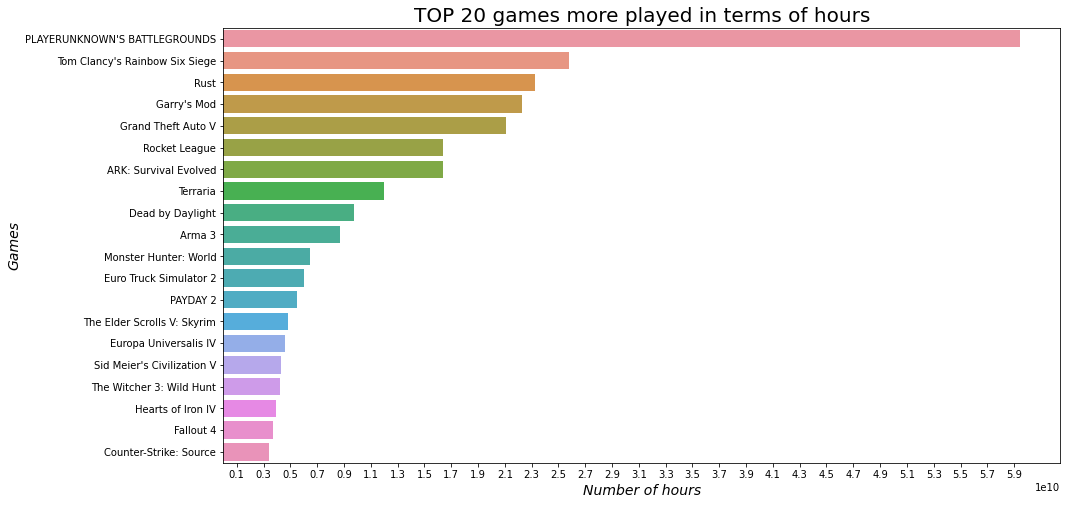

In [25]:
plt.figure(figsize = ((15, 8)))
sns.barplot(x = ore_di_gioco[:20], 
            y = giochi[:20], orient = 'h')
plt.title('TOP 20 games more played in terms of hours', size = 20)
plt.ylabel('Games', size = 14, style = 'italic')
plt.xlabel('Number of hours', size = 14, style = 'italic')
#plt.xscale('log')
plt.xticks(np.arange(1000000000,60000000000,2000000000)) 
plt.show()

In this barplot we have found some confirms: the games more played are also often the games more reviewed that were appeared in the pie chart.

#### Active players:
To conclude this first analysis we have tried to understand what are the players more useful for Steam: we have selected the ten authors that have written the most number of helpful and funny reviews. 

In [26]:
dataset_9 = pd.Series(dataset[(dataset.votes_helpful > 0)].groupby("author.steamid").votes_helpful.count().sort_values(ascending=False))

dataset_10 = pd.Series(dataset[(dataset.votes_funny > 0)].groupby("author.steamid").votes_funny.count().sort_values(ascending=False))

In [27]:
pd.concat([dataset_9[:11], dataset_10[:11]], axis=1).reset_index().fillna(0).sort_values(by=['votes_helpful'],ascending=False).reset_index(drop = True)

,author.steamid,votes_helpful,votes_funny
0,76561198315585536,132.0,131.0
1,76561198192166873,105.0,66.0
2,76561198045381877,103.0,0.0
3,76561198239163744,97.0,83.0
4,76561198027973295,89.0,0.0
5,76561198005667066,80.0,55.0
6,76561198011965365,79.0,0.0
7,76561197969749884,77.0,0.0
8,76561197970761123,76.0,0.0
9,76561198094803808,73.0,0.0


It's interesting to see that the authors who have written some funny reviews have also written helpful reviews. 

#### Languages and subplots

In [28]:
print("The total number of languages used to write reviews is ",'\033[1m' +str(len(dataset["language"].unique())) +'\033[0m')

The total number of languages used to write reviews is  28


Making a subplot we have been able to visualize all the present languages in the dataset and counting the number of reviews. The two subplots have different measure in y-scales!

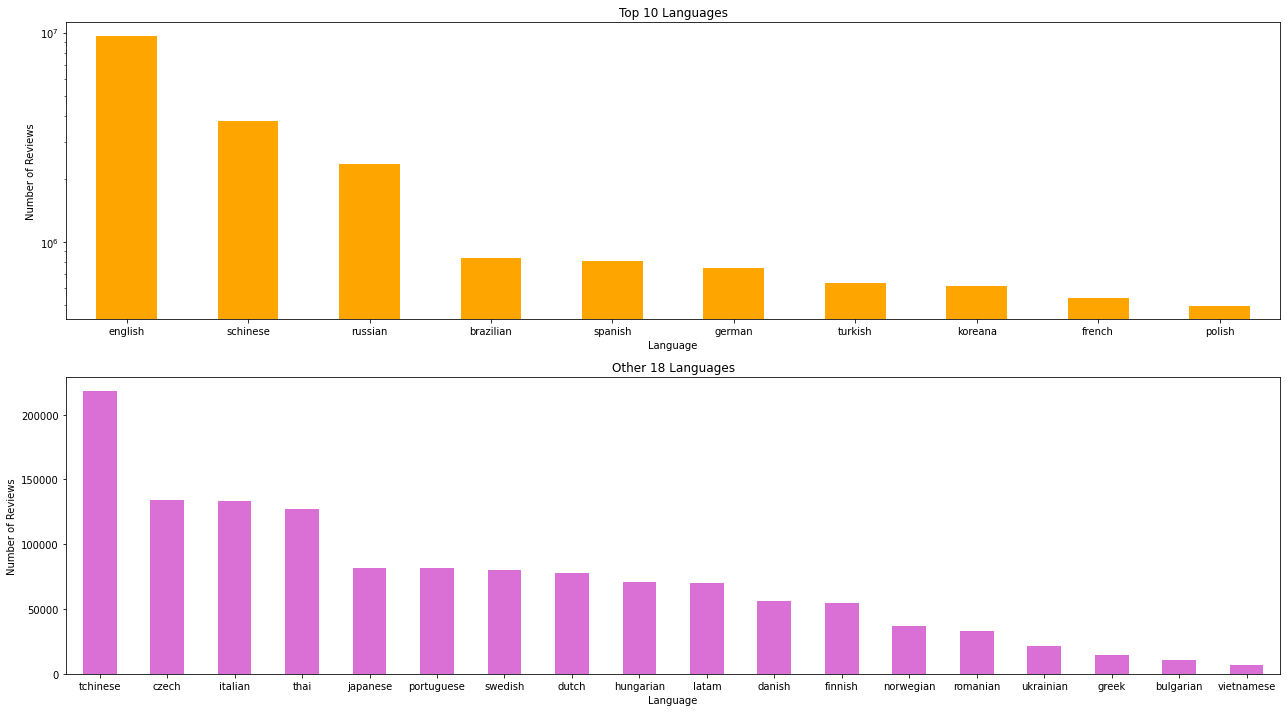

In [29]:
fig=plt.figure(figsize=(25,18))
ax1=fig.add_subplot(2,1,1)
dataset['language'].value_counts().head(10).plot.bar(figsize = (18, 10),title='Top 10 Languages',xlabel='Language',ylabel='Number of Reviews', ax = ax1,rot=0, logy = True, color = "orange")
ax2=fig.add_subplot(2,1,2)
dataset['language'].value_counts().iloc[-18:].plot.bar(figsize = (18, 10),title='Other 18 Languages',xlabel='Language',ylabel='Number of Reviews', ax = ax2,rot=0, color = "orchid")
fig.tight_layout();

#dataset['language'].value_counts().plot.bar(figsize = (18, 7),title='Top Languages',xlabel='Language',ylabel='Number of Reviews', ax = ax1)

# RQ2

### Plot the number of reviews for each application in descending order.

We have decided to make a barplot in which we have counted the number of reviews for the first 50 applications. We have decided 50 because it have seemed to us a good tradeoff to have a clean representation a pick the more reviewed games

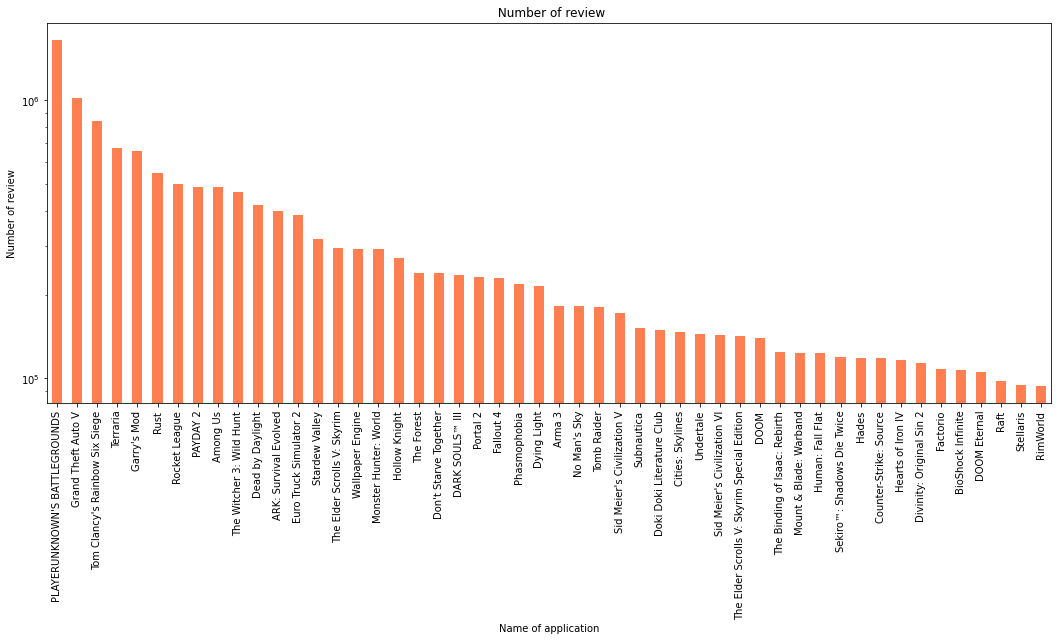

In [30]:
number_review = dataset.groupby("app_name").review_id.count().sort_values(ascending=False)
number_review[0:50].plot.bar(figsize = (18, 7), title=' Number of review', xlabel='Name of application',
ylabel='Number of review', color = "coral", logy = True)
plt.show()


In [31]:
# for a visual table to have an idea of how many reviews for the first 50 apps
number_review.reset_index().head(50)

,app_name,review_id
0,PLAYERUNKNOWN'S BATTLEGROUNDS,1644255
1,Grand Theft Auto V,1019116
2,Tom Clancy's Rainbow Six Siege,841918
3,Terraria,672815
4,Garry's Mod,655524
5,Rust,549074
6,Rocket League,498565
7,PAYDAY 2,487747
8,Among Us,485293
9,The Witcher 3: Wild Hunt,469395


### What applications have the best Weighted Vote Score?

Each review has a **Weighted Vote Score** that represents the helpfuness score of that review. To extract the weighted  vote score for each game we have computed the mean between all the vote for each application. In this way we have an idea about what applications have received the most helpfulness reviews. Then we have decided to select only average votes above 0.3 because we have considered it a good threshold for the best votes.   

In [32]:
medie = pd.DataFrame(dataset.groupby("app_name").weighted_vote_score.mean().sort_values(ascending=False))
medie = medie[medie.values > 0.3]
medie

,weighted_vote_score
app_name,
Hunt Down The Freeman,0.502150
Urban Empire,0.438623
METAL GEAR SURVIVE,0.421632
Identity,0.415384
Umbrella Corps,0.414678
Torment: Tides of Numenera,0.411199
BERSERK and the Band of the Hawk,0.397092
DRAGON QUEST HEROES™ II,0.381110
X Rebirth,0.380447


### Which applications have the most and the least recommendations

In this point, we thought that for most and least recommended apps, the percentage values where the ones to be aware of, meaning that an app was the most recommended if it has the higher percentage value of the most recommended reviews

In [33]:
#Most
# recommended. group_by app_name. count all recommended,
# count True recommended and False recommended in separate cols, and percentage of these.
# taking only the useful cols
new_data = dataset[['app_name', 'recommended']]
# count_rec col counts all recommended respectively False and True of an application
new_data['count_rec'] = new_data.groupby(['app_name', 'recommended'], sort=False)['recommended'].transform('count')

In [34]:
# all_rec col counts all recommedations, False and True together
new_data['all_rec'] = new_data.groupby("app_name", sort=False)['count_rec'].transform('count')

In [35]:
# final dataframe which contains only the True recommendations
# this means that we can calculate the most and the least recommended apps
final = new_data[(new_data['recommended']==True)].drop_duplicates()

In [36]:
# perc_rec calculates the percentage recommendation
final['perc_rec'] = (final['count_rec']/final['all_rec'])*100
# drop not useful cols
final.drop(['recommended', 'count_rec'], axis=1, inplace=True)

In [37]:
# most recommended, first 50
final.sort_values(by='perc_rec', ascending=False).reset_index(drop=True).head(50)

,app_name,all_rec,perc_rec
0,ULTRAKILL,5584,99.534384
1,Senren＊Banka,5034,99.404052
2,A Short Hike,5847,99.144861
3,The Henry Stickmin Collection,19400,99.025773
4,Factorio,108282,98.918564
5,Hades,118416,98.875996
6,Portal 2,232329,98.769418
7,People Playground,26319,98.768950
8,Townscaper,7601,98.710696
9,Half-Life: Alyx,51099,98.686863


We can see that the most recommended apps are not the one with the higher reviews

In [38]:
# least recommended, first 50
final.sort_values(by='perc_rec', ascending=True).reset_index(drop=True).head(50)

,app_name,all_rec,perc_rec
0,Identity,1804,24.334812
1,RollerCoaster Tycoon World,5304,24.509804
2,SOS,6900,27.840580
3,Umbrella Corps,2505,28.223553
4,NBA 2K18,18718,29.196495
5,DYNASTY WARRIORS 9,7807,31.228385
6,Urban Empire,2300,33.000000
7,Deus Ex: The Fall,3610,34.432133
8,NBA 2K21,15735,35.068319
9,Down To One,2101,37.934317


### How many of these applications were purchased, and how many were given for free?

In [39]:
# steam_purchase
# taking only the useful cols
new_data1 = dataset[['app_name', 'steam_purchase']]

In [40]:
# same modus operandi of counting recommendation
new_data1['count_pur'] = new_data1.groupby(['app_name', 'steam_purchase'], sort=False)['steam_purchase'].transform('count')

In [41]:
# taking only the ones purchased
final1 = new_data1[(new_data1['steam_purchase']==True)].drop_duplicates()

In [42]:
# drop not useful col
final1.drop(['steam_purchase'], axis=1, inplace=True)

In [43]:
# received_for_free
# taking only the useful cols
new_data2 = dataset[['app_name', 'received_for_free']]

In [44]:
# same modus operandi
new_data2['count_free'] = new_data2.groupby(['app_name', 'received_for_free'], sort=False)['received_for_free'].transform('count')

In [45]:
# take only the ones received_for_free
final2 = new_data2[(new_data2['received_for_free']==True)].drop_duplicates()

In [46]:
# drop not useful col
final2.drop(['received_for_free'], axis=1, inplace=True)

In [47]:
# now it's time to calculate the final result, by doing a merge of the final dataframes
dfs = [final, final1, final2]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['app_name'],
                                            how='outer'), dfs)

In [48]:
# taking the first 40 apps that are most recommended and displaying how many times were
# purchased and how many times were received for free
final_df.sort_values(by='perc_rec', ascending=False).head(40)

,app_name,all_rec,perc_rec,count_pur,count_free
134,ULTRAKILL,5584,99.534384,5167.0,104
139,Senren＊Banka,5034,99.404052,4635.0,49
81,A Short Hike,5847,99.144861,4566.0,99
82,The Henry Stickmin Collection,19400,99.025773,18591.0,537
60,Factorio,108282,98.918564,86472.0,1142
103,Hades,118416,98.875996,109447.0,989
4,Portal 2,232329,98.769418,182952.0,5779
108,People Playground,26319,98.768950,25021.0,1094
137,Townscaper,7601,98.710696,7243.0,75
314,Half-Life: Alyx,51099,98.686863,42639.0,2701


In [49]:
# least recommended
final_df.sort_values(by='perc_rec').head(40)

,app_name,all_rec,perc_rec,count_pur,count_free
38,Identity,1804,24.334812,513.0,40
23,RollerCoaster Tycoon World,5304,24.509804,2893.0,61
229,SOS,6900,27.840580,4799.0,301
39,Umbrella Corps,2505,28.223553,798.0,173
24,NBA 2K18,18718,29.196495,14722.0,213
247,DYNASTY WARRIORS 9,7807,31.228385,5271.0,265
288,Urban Empire,2300,33.000000,1814.0,23
26,Deus Ex: The Fall,3610,34.432133,2808.0,24
25,NBA 2K21,15735,35.068319,11006.0,242
42,Down To One,2101,37.934317,1633.0,52


# RQ 3

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

First of all, we take only the `timestamp_created` col and we convert in `string` the time values. Next, with a simple dictionary and a `for` cycle, we count the occurrences of every single time (HH:MM) and at the end we return only the most common time.

In [50]:
# first point
# taking only the timestamp_created col
timestamp_col = np.array(dataset["timestamp_created"].dt.time.astype('str'))

In [51]:
dict_time = {}
for time in timestamp_col:
    # taking only hour and minute
    new_time = time[:5]
    if new_time not in list(dict_time.keys()):
        dict_time[new_time] = 1
    else:
        dict_time[new_time] += 1

In [52]:
# sorting the dictionary in descending order
dict_time_sorted = {k: v for k, v in sorted(dict_time.items(), key=lambda item: item[1], reverse=True)}

In [53]:
# returning the most common time (without seconds)
next(iter(dict_time_sorted))

'14:50'

### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

Using the function **orario** we can extract for a given list of time interval the number of reviews written in each time interval 


### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [54]:
intervalli = ['06:00:00', '10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59',
        '17:00:00', '19:59:59', '20:00:00', '23:59:59', '00:00:00', '02:59:59', '03:00:00',
        '05:59:59']

C:\Users\Clara\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


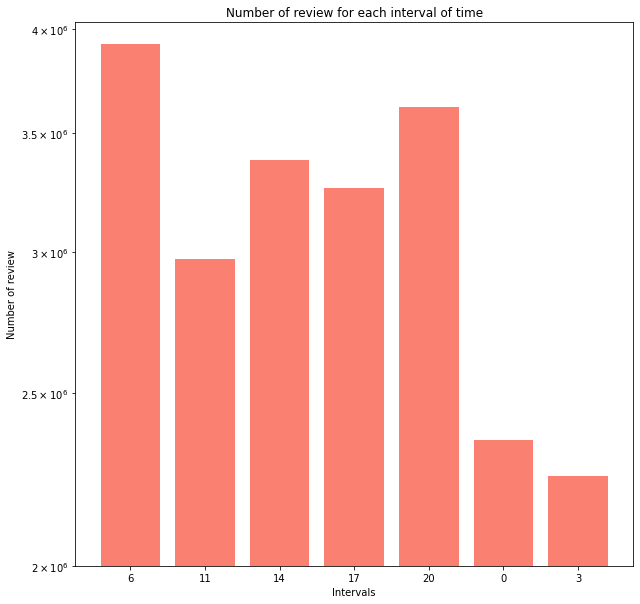

In [55]:
functions.orario(intervalli)

On the x-axis for each bar is indicated the starting point of the time interval. We have observed that fewer people have written reviews during the night while the majority of people have written their reviews in the first hours of the morning and in the dinner hours

# RQ4

### What are the top 3 languages used to review applications?

In [56]:
top_languages = pd.DataFrame(dataset.groupby("language").review_id.count().sort_values(ascending=False).head(3))
top_languages

,review_id
language,
english,9635437
schinese,3764967
russian,2348900


As expected the majority of the reviews are written in english, chinese and russian!

In [57]:
top_languages = list(top_languages.index)
top_languages

['english', 'schinese', 'russian']

### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

There we have used the function **get_reviews_by_languages** to accomplish a dataframe where there are only reviews written in the top 3 languages

In [58]:
dataset_filter = functions.get_reviews_by_languages(dataset, top_languages)

### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

For this request we have used the new filtered dataset and for each language we have selected the reviews that have received at least one funny vote and then we have computed the ratio between them and all the reviews written in that language.

To compute this percentage we have used **dataset_filter** that is the new dataframe obtained using the previous function **filtro**

In [59]:
numeratore_1 = []
denominatore_1 = []
rapporto_1 = []
for i in range(len(top_languages)):
    numeratore_1.append(dataset_filter.loc[(dataset_filter.votes_funny != 0) & (dataset_filter.language == top_languages[i])].votes_funny.count())
    denominatore_1.append(dataset_filter[dataset_filter.language == top_languages[i]].votes_funny.count())
    rapporto_1.append(round((numeratore_1[i]/denominatore_1[i])*100, 2))
    print("The percentage of reviews written in " + '\033[1m' + top_languages[i] +'\033[0m' +
          " that has received at least a funny vote is " +
          '\033[1m' + str(rapporto_1[i]) + "%" + '\033[0m')


The percentage of reviews written in english that has received at least a funny vote is 11.27%
The percentage of reviews written in schinese that has received at least a funny vote is 11.82%
The percentage of reviews written in russian that has received at least a funny vote is 16.68%


At this point we have also wanted to compute the percentage of reviews that have received at least a funny vote among all these three languages. 

In [60]:
# same as above
print("The percentage of reviews written in one of the top 3 language that has received at "
      "least a funny vote is " + '\033[1m' + str(round((sum(numeratore_1)/sum(denominatore_1))*100, 2)) + "%" + '\033[0m')

The percentage of reviews written in one of the top 3 language that has received at least a funny vote is 12.21%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

For this request we have used the new filtered dataset and for each language we have selected the reviews that have received at least one helpful vote and then we have computed the ratio between them and all the reviews written in that language.

To compute this percentage we have used **dataset_filter** that is the new dataframe obtained using the previous function **filtro**

In [61]:
numeratore_2 = []
denominatore_2 = []
rapporto_2 = []
for i in range(len(top_languages)):
    numeratore_2.append(dataset_filter.loc[(dataset_filter.votes_helpful != 0) & (dataset_filter.language == top_languages[i])].votes_helpful.count())
    denominatore_2.append(dataset_filter[dataset_filter.language == top_languages[i]].votes_helpful.count())
    rapporto_2.append(round((numeratore_2[i]/denominatore_2[i])*100, 2))
    print("The percentage of reviews written in " + '\033[1m' + top_languages[i] + '\033[0m' +
          " that has received at least a helpful vote is " +
          '\033[1m' + str(rapporto_2[i]) + "%" + '\033[0m')

The percentage of reviews written in english that has received at least a helpful vote is 29.2%
The percentage of reviews written in schinese that has received at least a helpful vote is 25.1%
The percentage of reviews written in russian that has received at least a helpful vote is 35.5%


At this point we have also wanted to compute the percentage of reviews that have received at least a helpful vote among all these three languages.

In [62]:
# same as above
print("The percentage of reviews written in one of the top 3 language that has received at "
      "least a helpful vote is " + '\033[1m' + str(round((sum(numeratore_2)/sum(denominatore_2))*100, 2)) + "%" + '\033[0m')

The percentage of reviews written in one of the top 3 language that has received at least a helpful vote is 29.16%


# RQ5

### Plot the top 10 most popular reviewers and the number of reviews.

In [63]:
num_reviewers = dataset['author.steamid'].value_counts().head(10)

<AxesSubplot:xlabel='TOP 10 reviewers', ylabel='number of reviews'>

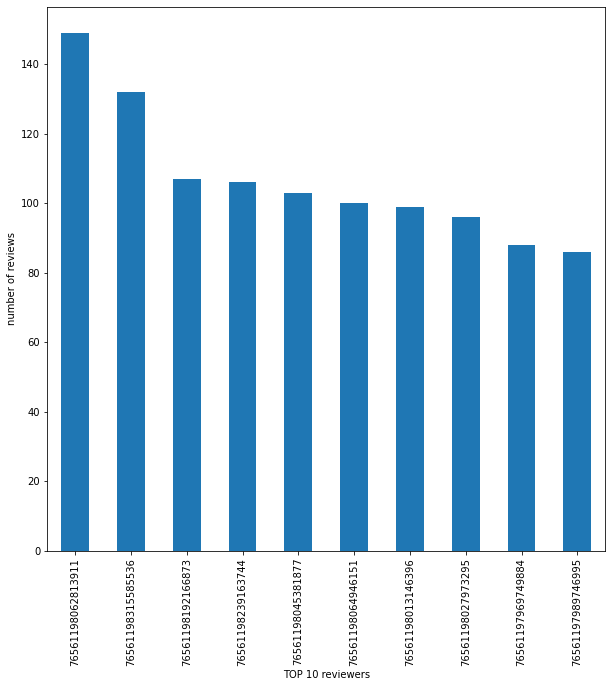

In [64]:
num_reviewers.plot(kind='bar',
                   xlabel='TOP 10 reviewers',
                   ylabel='number of reviews')

### What applications did the most popular author review?


At first, we took the previous result of the most popular author to leave only the rows of the reviews written by him/her, and then we returned all the applications reviewed by this author.

In [65]:
num_rev = pd.DataFrame({'reviewers':num_reviewers.index, 'num_reviews':num_reviewers.values})

In [66]:
pop_auth = num_rev['reviewers'][0]

In [67]:
apps_rev = dataset[dataset['author.steamid'] == pop_auth].app_name

In [68]:
app_name_rev = list(apps_rev.values)

In [69]:
app_name_rev = [el for el, count in Counter(app_name_rev).items()]

In [70]:
print(app_name_rev)

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod", "Sid Meier's Civilization V", 'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat', 'Banished', 'Celeste', 'Getting Over It with Bennett Foddy', 'A Hat in Time', 'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth', 'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy', "Don't Escape: 4 Days to Survive", 'Volgarr the Viking', 'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight', 'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm', 'Euro Truck Simulator 2', 'Foundation', 'Kenshi', 'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal', 'Age of Empires: Definitive Edition', 'Void Bastards', 'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares', 'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia', 'Mount & Blade: Warband', 'Resident Evil 2', 'Slime Rancher', 'Hotline Miami', 'Tomb Raider', 'BattleBlock Theater', 'D

### How many applications did he/she purchase, and how many did he/she get as free? Provide the number (count) and the percentage.

In [71]:
# taking only the steam_purchase and received_for_free apps of the author
app_count = dataset[dataset['author.steamid'] == pop_auth][['steam_purchase', 'received_for_free']]

In [72]:
# how many app did the author reviewed
tot_app_rev = len(app_count.index)


In [73]:
purchased = dict(Counter(app_count['steam_purchase']))
free_apps = dict(Counter(app_count['received_for_free']))

In [74]:
purchased[True] = [purchased[True], "{:.2%}".format(purchased[True]/tot_app_rev)]
purchased[False] = [purchased[False], "{:.2%}".format(purchased[False]/tot_app_rev)]
free_apps[True] = [free_apps[True], "{:.2%}".format(free_apps[True]/tot_app_rev)]
free_apps[False] = [free_apps[False], "{:.2%}".format(free_apps[False]/tot_app_rev)]

In [75]:
purch_df = pd.DataFrame(purchased, index=['count', 'Percentage']).T
free_df = pd.DataFrame(free_apps, index=['count', 'Percentage']).T

In [76]:
purch_df.index.name = 'App Purchased'
free_df.index.name = 'App given Free'

In [77]:
purch_df

,count,Percentage
App Purchased,,
True,110,73.83%
False,39,26.17%


`True` means that the apps were purchased, `False` doesn't.

In [78]:
free_df

,count,Percentage
App given Free,,
False,145,97.32%
True,4,2.68%


`True` means that the apps were given for free, `False` doesn't.

There is a significant difference between the purchased and the free apps: the first ones were mostly purchased on Steam, and the latter only 4 apps were given for free, then this means that not every app that the author reviewed was purchased on Steam, because if we assume that all the purchased apps are counted also in the "not given for free" ones, then we have 35 apps purchased somewhere else, and counting also the 4 apps given for free, we have all the apps not purchased on Steam, which are 39.

### How many of the applications he/she purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [79]:
# have to use the recommended col
app_recomm = dataset.loc[(dataset['author.steamid'] == pop_auth) & (dataset['recommended'] == True)][['steam_purchase', 'received_for_free']]

In [80]:
purchased_rec = dict(Counter(app_recomm['steam_purchase']))
free_apps_rec = dict(Counter(app_recomm['received_for_free']))
tot_app_rec = len(app_recomm.index)

In [81]:
print('{} applications purchased were reviewed positively, and {} were reviewed negatively'
      .format(purchased_rec[True], purchased_rec[False]))
print('{} applications given for free were reviewed positively, and {} were reviewed negatively'
      .format(free_apps_rec[True], free_apps_rec[False]))

108 applications purchased were reviewed positively, and 38 were reviewed negatively
4 applications given for free were reviewed positively, and 142 were reviewed negatively


Comparing these results with the ones in the previous question, we can see that 3 apps were not recommended positively nor negatively, and those are, using the same hypothesis of the previous answer, 2 purchased on Steam and 1 purchased elsewhere. Also we can see that all apps given for free where recommended positively, which means that the author liked playing with them (and we assume that he/she also liked their quality of being "free")

# RQ6 


### What is the average time (days and minutes) a user lets pass before he updates a review?

Just to start we have computed the difference between the time when the review is written and time when the review is updated and then we have transformed this difference in terms of days

In [82]:
dataset['difference_days'] = (dataset['timestamp_updated'] - dataset['timestamp_created'])
dataset['difference_days'] = dataset['difference_days']/np.timedelta64(1,'D')

After that we have deleted who did not update his review because we have thought that is meaningless consider them. Then we have computed the mean between days and the integer part of this number represents the average number of days after an author updates his review. Instead to transform the decimal part in minutes we have to multiply it for 1440 because in one day there are 1440 minutes. We have made a simple proportion: *1 : 1440 = x : (decimal part of our number)*

In [83]:
dataset_1 = dataset[dataset.difference_days != 0]
average = dataset_1.difference_days.mean()
minutes = round((average % 1) * 1440, 0)
days = average // 1
print("The average time a user lets pass before he updates a review is "+
      '\033[1m' + str(days) + '\033[0m' + " days and " + '\033[1m' + str(minutes) + '\033[0m' + " minutes")

The average time a user lets pass before he updates a review is 321.0 days and 46.0 minutes


On average an author updates his review almost after a year! 

### Plot the top 3 authors that usually update their reviews.

We have used the dataframe **dataset_1** in which there are only the reviews that have been updated. We did not use the starting dataset because we have to extract who are the authors that usually update their reviews so authors that have updated more reviews through time.

In [84]:
a = pd.Series(dataset_1.groupby('author.steamid').review_id.count().sort_values(ascending=False).head(3))
a

author.steamid
76561198192166873    95
76561198206999976    61
76561198072450805    60
Name: review_id, dtype: int64

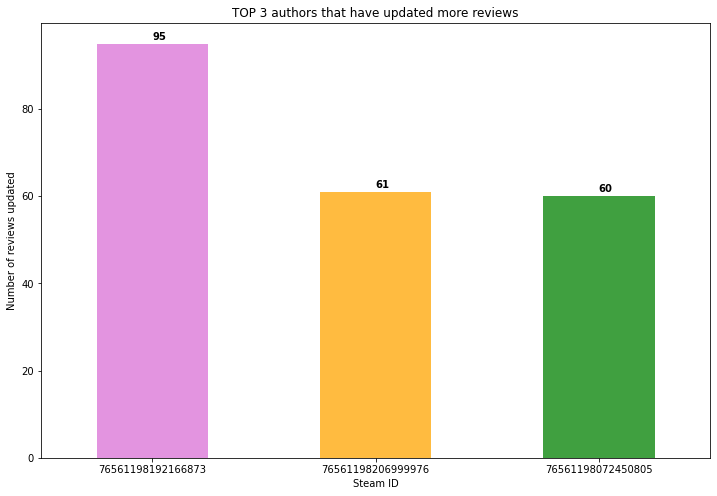

In [85]:
#bar plot
plt.figure(figsize=(12, 8))
ax = a.plot(kind="bar", color = ["orchid", "orange", "green"], alpha=0.75, rot=0)
ax.set_title("TOP 3 authors that have updated more reviews")
ax.set_xlabel("Steam ID")
ax.set_ylabel("Number of reviews updated")
#needed to put values on top of the bar
for i, v in enumerate(a.values):
    ax.text(i, v+1, str(v), color='black', fontweight='bold')

We have put the number of reviews over the bars because the second and the third author have updated almost the same number of reviews.

# RQ7

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

We have used the definition of probability to compute these values indeed we have count the number of reviews that has a Weighted Vote Score equal to or bigger than 0.5 and this number represents the favourable case (we have stored this number in **casi_fav**)while the number of total case is represented by the number of the lines of our dataset, stored in **casi_tot**. The probability is the ratio between them. 

In [86]:
#filter the dataset picking only weighted_vote_score >= 0.5
#and count the rows of filter dataset
casi_fav = dataset[dataset.weighted_vote_score >= 0.5].weighted_vote_score.count()
casi_fav

4784092

In [87]:
#number of rows of initial dataset
casi_tot = dataset.weighted_vote_score.count()

In [88]:
result_1 = round(casi_fav/casi_tot, 2)
print("The probability is of a review has a Weighted Vote Score equal to or bigger than 0.5 is "+ '\033[1m' +str(result_1)+'\033[0m')

The probability is of a review has a Weighted Vote Score equal to or bigger than 0.5 is 0.22


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

We want to compute this conditional probability P(B|A) where B is the event: *a review has at least one vote as funny*. The sample space will be reduced, indeed we have filtered the dataset in such way that we are going to look for reviews with at least one vote as funny just among reviews with Weighted Vote Score is bigger than 0.5.

In [89]:
#new sample space: filter dataset like before
# A
dataset_prob = dataset[dataset.weighted_vote_score > 0.5]

In [90]:
#count the reviews with at least a funny vote in the new filter dataset
#B intersect A
casi_fav_2 = dataset_prob[dataset_prob.votes_funny != 0].votes_funny.count()

In [91]:
#A
casi_tot2 = dataset_prob.weighted_vote_score.count()
#P(B|A)
result_2 = round(casi_fav_2/casi_tot2, 2)
print("The conditional probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is ",'\033[1m' +str(result_2)+'\033[0m')

The conditional probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is  0.25


### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5"?

To be independent these two events it would happen that the probability of the event B: *a review has at least one vote as funny* would be equal to *probability that a review has at least one vote as funny given that the Weighted Vote Score is equal or bigger than 0.5, that is P(B|A);* because in this way the conditioning of the two probability is useless given that they are independent.

To be independent these two events it would happen that the P(B) would be equal to P(B|A) because in this way the conditioning of the two probability is useless given that they are independent: P(B|A) = P(B).

In [92]:
#P(B|A)
casi_fav_ba = dataset[(dataset.weighted_vote_score >= 0.5) & (dataset.votes_funny != 0)].votes_funny.count()
result_3a = round(casi_fav_ba/casi_fav, 2)
print("The conditional probability that a review has at least one vote as funny given that the Weighted Vote Score is equal or bigger than 0.5 is ",'\033[1m' +str(result_3a)+'\033[0m')

The conditional probability that a review has at least one vote as funny given that the Weighted Vote Score is equal or bigger than 0.5 is  0.25


In [93]:
#count the reviews with at least a funny vote in the starting dataset
#B
casi_fav_3 = dataset[dataset.votes_funny != 0].votes_funny.count()

In [94]:
#P(B)
result_3 = round(casi_fav_3/casi_tot,2)
print("The probability of a review has at least one vote as funny is "+ '\033[1m' +str(result_3)+'\033[0m')

The probability of a review has at least one vote as funny is 0.12


0.12 is different from 0.25 so these two events are **dependent!**

# RQ8

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

We'll use a non-parametric(Kolgomoronov-Smirnov) test in order to find if the 2 distribution are the same(comes from the same population) or not, since the 2 distributions are not normally distributed

In [95]:
data_lang = functions.get_reviews_by_languages(dataset,["schinese","russian"])

First at all we compare chinese weighted score distribution and russian weighted score distribution using histograms. At first glance there does not seem to be any significant differences between the two distribution. From this plot those 2 distributions seems that distributes equally.

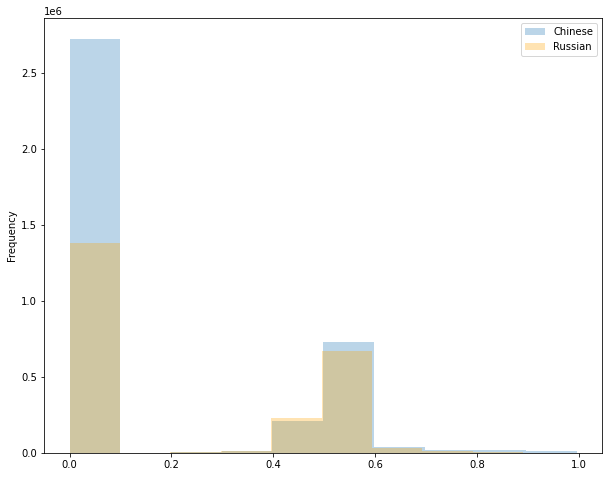

In [96]:
plt.figure(figsize = (10,8))
data_lang[data_lang.language == "schinese"].weighted_vote_score.plot(kind = "hist", label = "Chinese",alpha = 0.3)
data_lang[data_lang.language == "russian"].weighted_vote_score.plot(kind = "hist", label = "Russian", color = "orange",alpha = 0.3)
plt.legend()

So we can support the choice with a statistaical test.Let's check with the KS test

In [97]:
k_smir_test = ks_2samp(data_lang[data_lang.language == "schinese"].weighted_vote_score,
                       data_lang[data_lang.language == "russian"].weighted_vote_score)
if k_smir_test.pvalue <= 0.1:
    print("the two distributions are identical.")
else:
    print(f"the 2 distributions are different with a pvalue of {k_smir_test.pvalue}")

the two distributions are identical.


The Kolmogorov-Smirnov test is a non-parametric test that checks the shape of sample distributions. It can be used to compare two samples and It does not in itself require any assumptions about the sample distribution, like in our case. The acceptance of the H0 hypothesis predicts that the two distributions belong to the same population.

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

We'll discover if there is a relationship into 3 step:
 * plot
 * pearson correlations
 * Linear Regression

no relationship visible


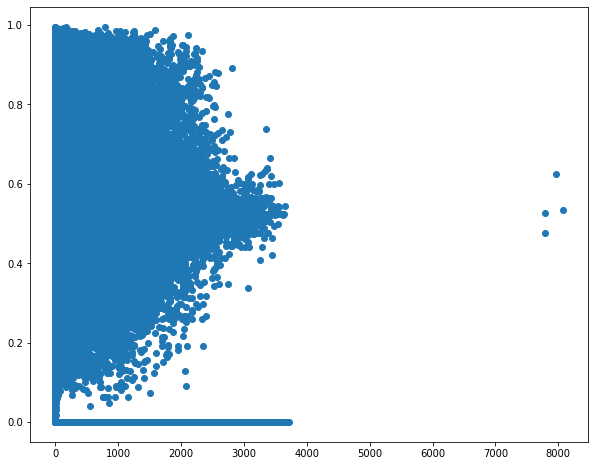

In [98]:
# step 1: plot
plt.figure(figsize = (10,8))
plt.scatter(dataset.difference_days, dataset.weighted_vote_score)
print("no relationship visible")

In [99]:
# step 2: pearson correlation
print(pearsonr(dataset.difference_days, dataset.weighted_vote_score))
print("no relations detected ")

(0.07204700562113138, 0.0)
no relations detected 


In [100]:
X = dataset[["difference_days"]]
X = sm.add_constant(X).values
model = sm.OLS(dataset.weighted_vote_score, X)
res = model.fit()

In [101]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     weighted_vote_score   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                 1.135e+05
Date:                 Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                         14:17:34   Log-Likelihood:                -71544.
No. Observations:             21747371   AIC:                         1.431e+05
Df Residuals:                 21747369   BIC:                         1.431e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1619   5.31e-05   3048.553      0.000       0.162       0.162
x1          9.792e-05   2.91e-07    336.860      0.000    9.74e-05    9.85e-05
==============================================================================
Omnibus:                 11489550.572   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3686236.042
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       1.891   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

using Simple Linear Regression (1 X variable) is the same that using pearsonr because
$R^{2}Score = (pearsonr)^2 $

In [102]:
p = pearsonr(dataset.difference_days, dataset.weighted_vote_score)
print(f"pearsonr {p[0]}\npearsonr^2 = {p[0]**2} -> same as R-squared detected above")

pearsonr 0.07204700562113138
pearsonr^2 = 0.005190771018971337 -> same as R-squared detected above


The second test is linear regression: also in this case there is no evidence that between two variables there is a sort of correlation.

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

just adding another variable into Linear Regression

In [103]:
X = dataset[["difference_days","recommended","weighted_vote_score"]].astype({"recommended":int})
model = smf.ols("weighted_vote_score ~ difference_days + C(recommended)", data=X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     weighted_vote_score   R-squared:                       0.038
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                 4.290e+05
Date:                 Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                         14:18:23   Log-Likelihood:             2.9263e+05
No. Observations:             21747371   AIC:                        -5.853e+05
Df Residuals:                 21747368   BIC:                        -5.852e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2792      0.000   1923.833      0.000       0.279       0.279
C(recommended)[T.1]    -0.1338      0.000   -865.303      0.000      -0.134      -0.134
difference_days      9.164e-05   2.86e-07    320.477      0.000    9.11e-05    9.22e-05
==============================================================================
Omnibus:                  5161093.731   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3402870.313
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                       2.090   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

no changes in relationships

### What are histograms, bar plots, scatterplots and pie charts used for?

Histogram: This type of data visualization helps to interpret univariate analysis results. Simply put, it shows where data points are dense and where they are sparse in one dimension. However, instead of comparing the categorical data, it breaks down a numeric data into interval groups and shows the frequency of data fall into each group. Histogram is good at identifying the pattern of data distribution on a numeric spectrum.

Bar Chart: Bar chart compares the measure of categorical dimension. Bar chart is very similar to a histogram. The fundamental difference is that the x-axis of bar charts is categorical attribute instead of numeric interval in the histogram. Furthermore, bar chart is not just limited to plot one categorical data. An extension of bar chart, clustered bar chart (or group bar chart) compares two categorical attributes.

Scatterplot: It plots one numeric attribute against another numeric attribute and visualizes the correlation between axes. Scatter plot is commonly applied to identify regression type of relationships such as linear regression, logistic regression etc. It also provides a robust analysis of the correlation significance. We can estimate that the correlation relationship is stronger,linearly, when the data points lying on a line with a certaing degree, whereas the relationship is weak if the line is flat.

Piechart: It is used to represent the percentage and weight of components belonging to one categorical attribute. The size of the pie slice is proportional to the percentage, hence it intuitively depicts how much each component occupies the whole.

### What insights can you extract from a Box Plot?

A boxplot shows the distribution of the data with more detailed information. from Box Plot we can "extract" information such as outliers, maximum, minimum, first quartile(Q1), third quartile(Q3), interquartile range(IQR), and median. It also gives you the information about the skewness of the data, how tightly closed the data is and the spread of the data.

# $TQ_1$
## Question 1
As known, given a random variable $X$, the Quantile function *Q($\cdot$)* with support $\{ p | p \in [0,1] \}$ is the function that computes:

\begin{equation}
Q(p)=s \hspace{0.2 cm} |\hspace{0.2 cm} \mathcal{P}(X<=s) = p
\end{equation}

Denoting with $A_i$ the i-th element of the vector $A$ of length $n$ and given $k \in [0,n]$, it is possible to see that our algorithm compute:<br>

\begin{equation}
    alg(A,k)=s \hspace{0.2 cm} |\hspace{0.2 cm} \#\{A_i<=s\} = k
\end{equation}

It is then easily possible to perform some trasformations over our algorithm parameters in order to obtain the similarities with the quantile function, i.e.:

1. A shrinkage over our algorithm support space (i.e. $k'=k/n$);

2. A shrinkage over our cardinality measure (i.e. $\#\{A_i<=s \}'=\frac{\#\{A_i<=s \}}{n}$);

Substituting into our $alg(A,k)$ it becomes:
\begin{equation}
    alg(A,k')=s\hspace{0.2 cm} |\hspace{0.2 cm} \frac{\#\{A_i<=s\}}{n} = k'
\end{equation}
In a frequentist approach (said $A_r$ a random sample of the vector $A$) we can equal $\frac{\#\{A_i<=s\}}{n}= \mathcal{P}(A_r <= s)$; In words, our algorithm is computing the value $s$ so that the number of elements in the array $A$ smaller or equal to $s$ will be equal to $k$: we can so somehow define our algorithm a "quantile function over a non-normalized support".
## Question 2
Let consider the worst case scenario, i.e. imagine that $k=n$ and that at each iteration the random sample $s$ will always be equal to $A_1$: it basically means that the $s$ satisfying the condition over $k$ will be selected at the $n_{th}-1$ iteration (when the vector $A$ over which we are calling $alg()$ has lenght equal to 2), we can then assume an asymptotical complexity in the worst case scenario (removing costant therms) equal to $\mathcal{O}(n)$.
## Question 3
In the best case scenario, the right $s$ will always be picked up at the first iteration, regardless of $n$=len($A$): the asymptotical complexity will then be equal to $\mathcal{O}(1)$.

# $TQ_2$
## Question 1
Let dive into the interpretation of the given recursive algorithm's complexity. It is clear that, given a particular $n$ and $\forall l$, and expressing with $T(n)$ the time needed to complete the algorithm called with parameter $n$:

\begin{equation}
    T(n) = T\left(\frac{n}{2}\right)\cdot 2 + \left(\frac{n}{2}+1\right)\cdot 3
\end{equation}

Indeed, calling **splitSwap(a,l,n)** we will have to solve two times **splitSwap(a,l,n/2)** plus execute 3 operations for each of the $\left(\frac{n}{2}+1\right)$ iterations of the for loop into **swapList(a,l,n)**. Lets compute running times after the expression of $T(n)$:

\begin{equation}
    T\left(\frac{n}{2}\right) = T\left(\frac{n}{2^2}\right)\cdot 2 + \left(\frac{n}{2^2}+1\right)\cdot 3
\end{equation}

\begin{equation}
    T(n) = T\left(\frac{n}{2^2}\right)\cdot 2^2 + \left(\frac{n}{2^2}+1\right)\cdot2 \cdot 3 +\left(\frac{n}{2}+1\right)\cdot 3
\end{equation}

\begin{equation}
    T(n) = T\left(\frac{n}{2^2}\right)\cdot 2^2 + \left(\frac{n}{2}+1\right)\cdot2 \cdot 3 +3
\end{equation}

\begin{equation}
    T\left(\frac{n}{2^2}\right) = T\left(\frac{n}{2^3}\right)\cdot 2 + \left(\frac{n}{2^3}+1\right)\cdot 3
\end{equation}

\begin{equation}
    T(n) = T\left(\frac{n}{2^3}\right)\cdot 2^3 + \left(\frac{n}{2}+1\right)\cdot 3 \cdot 3 +7
\end{equation}

\begin{equation}
    T(n) = T\left(\frac{n}{2^k}\right)\cdot 2^k + \left(\frac{n}{2}+1\right)\cdot k \cdot 3 +log_2(2^k)-1
\end{equation}

Setting $2^k=n \Leftrightarrow k =log_2(n)$ we obtain:

\begin{equation}
    T(n) = T(1)\cdot n + \left(\frac{n}{2}+1\right)\cdot log_2(n) \cdot 3 +log_2(n)-1 \simeq n\cdot log_2(n)
\end{equation}

In the latter we have removed the dependency from factors, constant terms and considered only the term with the biggest growth rate w.r.t $n$. We can than say that the asymptotical complexity of the algorithm is $\mathcal{O}(n\cdot log_2(n))$.

## Question 2
Given an array **a**, an index **l** and a number **n** (considering the scenario where both **len(a)** and **n** are power of 2 numbers), the algorithm output the array **a'** built as follows:

\begin{equation}
    a'[i]=a[i] \hspace{1cm}\forall i \in [0,1,...,l-1]\hspace{1cm}\mbox{if}\hspace{1cm} l \geq 1
\end{equation}

\begin{equation}
     a'[l+i]=a[l+n-i]
\end{equation}

In words, starting from an index **l** of the original array **a**, the algorithm is reversing the position of the first **n** elements of the array. Because of this of course it is required that **l+n** $\leq$ **len(a)**, otherwise the subroutine **swapList()** will raise an error because of the out-of-range index it loops on. Let describe the algorithm's mechanism. Looking at the code, we can assess how the only part of the code actually changing the position of the array's elements is the subroutine **swapList()**. Given a triplet **(a,l,n)**, once **splitSwap()** is called, it will recursively call himself with an **n** halfed call by call (i.e. **n**$^{(1)}$ =**n/2**, **n**$^{(2)}$ =**n**$^{(1)}/2$, **n**$^{(3)}$ =**n**$^{(2)}/2$ and so on). As we can see in the (Fig.1), after $\text{log}_2(n)-1$ steps, the function **splitSwap(a,l,2)** will be called: in its execution both **splitSwap(a,l,1)** and **splitSwap(a,l+1,1)** will **return** (being **n**=1), finally allowing the execution of **swaplist(a,l,2)** (that we will call **final-node-subroutine** $\forall l$) that will exchange the position of the array's elements **a[l]** with **a[l+1]**. Being  **splitSwap(a,l,2)** completed,  **splitSwap(a,l+2,2)** will be called. Similary, at the end of the execution its **final-node-subroutine** will exchange the position of the array's elements **a[l+2]** with **a[l+3]**. Basically the **final-node-subroutines** consider the array (starting from the element $a[l]$) as a sequence of $\frac{n}{2}$ couples of elements and in each couple they exchange the 1st element with the 2nd one.

Recalling that **splitSwap(a,l,2)** and **splitSwap(a,l+2,2)** where called in **splitSwap(a,l,4)**, **swapList(a,l,4)** (that we will call **semi-final-node-subroutine**) will finally be executed, exchanging the position of the array's elements **a[l]** with **a[l+2]** and **a[l+1]** with **a[l+3]**. So the role of **semi-final-node-subroutines** is to consider the array (starting from the element $a[l]$) as a sequence of $\frac{n}{4}$ couples of couples and to exchange the position of the 1st element of the 1st couple with the 1st element of the 2nd couple, and the 2nd element of the 1st couple with the 2nd element of the 2nd couple. Basically, after the execution of all the **final-node-subroutines** and of the  **semi-final-node-subroutines** the position of the 1st group of 4 elements of the original array will be reversed, the same for the 2nd group of 4 elements and so on. We can so climb our recursive function tree from the **final-node-subroutines** up to the top **first-final-node-subroutine** i.e. **swapList(a,l,n)**. We can see the effect of each kind of **subroutine** level over a test array in two examples at (Fig.2,3) recalling that the output of the **first-final-node-subroutine** will be equal to the algorithm's output.

Having assessed that the algorithm complexity is $\simeq O(n\cdot log_2(n))$, it is possible to confirm that the algorithm it's not optimal: infact it is easily possible to write some pseudo-code with a lower complexity than the given algorithm:

```python
def reverse(a,l,n):
    reversed_array=a
    for i in range(n):
        reversed_array[i+l]=a[l+n-i]
    return reversed_array
```

We can easily see that the **reverse()** algorithm complexity has now become (removing costant therms and factors) $O(n)$, proving that the **splitSwap()** algorithm was not optimal.

In order:
Fig.1 :Reaching the first final-node-subroutine
Fig.2 :Test over a with len(a)=n=16, l=0
Fig.3 :Test over a with len(a)=16, n=8, l=7

![Fig.1 :Reaching the first final-node-subroutine](images/root.png "Fig.1 :Reaching the first final-node-subroutine")
<figcaption align="center"> Fig.1 :Reaching the first final-node-subroutine</figcaption>
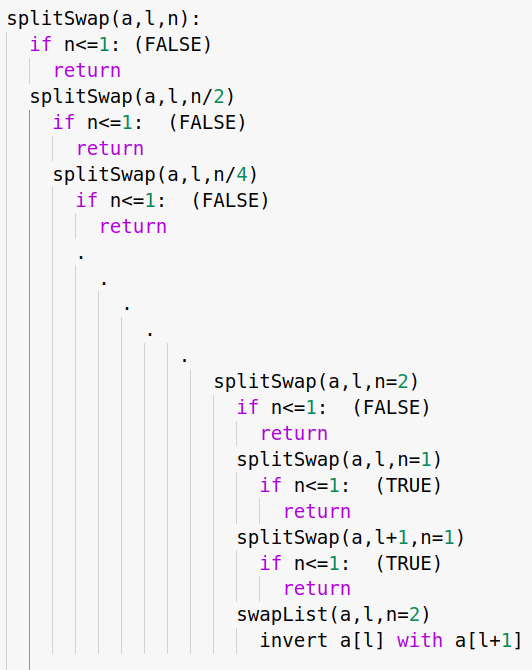

![test1.png](images/test1.png "Fig.2 :Test over a with len(a)=n=16, l=0")
<figcaption align="center"> Fig.2 :Test over a with len(a)=n=16, l=0</figcaption>
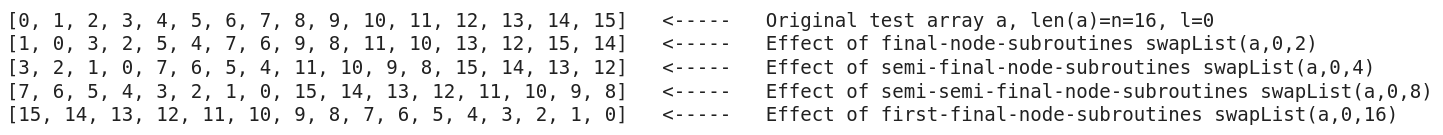

![test2.png](images/test2.png "Fig.3 :Test over a with len(a)=16, n=8, l=7")
<figcaption align="center"> Fig.3 :Test over a with len(a)=16, n=8, l=7</figcaption>
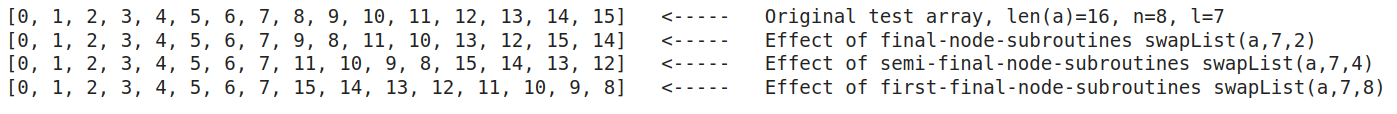

# $TQ_3$: Knapsack
In this theoretical question we have to face with a NP-complete problem: the Knapsack one. To solve it generally we have to use heuristic solutions but in some cases they fail to provide the optimal solution.
* The first heuristic solution is a greedy algorithm in which we order the object in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded. This algorithm does not provide the optimal solution in every situation indeed in my counterexample this greedy algorithm fails: we fix the budget: **W** = 10 and we have three object.


|i    |w_i| v_i|
|-----|---|----|
|1    |4  |3   |
|2    |6  |5   |
|3    |10 |9   |

We have to visit the object sequentially so we are going to pick the first two objects, but we cannot pick the third one because we will exceed the budget. This choice is not optimal because it would be better pick only the third object because its values (9) is greater of the sum of the first two (8).

* In the second heuristic solution we have to order the objects in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded. This algorithm does not provide the optimal solution in each situation indeed in my counterexample this greedy algorithm fails: I have decided to choose the same budget **W** = 10 and the same number of object of the last counterexample.

|i    |w_i| v_i|
|-----|---|----|
|1    |9  |9   |
|2    |7  |7   |
|3    |3  |3   |

We have to visit the objects sequentially so we are going to pick the first object, but we cannot pick the last two because we will exceed the budget. This choice is not optimal because it would be better pick the second and the third objects because the sum of their values (10) is greater of the first object value (9).

* In the third heuristic solution we have to order them in decreasing relative value ($v_1$/ $w_i$), and then visit them sequentially, adding them to the solution if the budget is not exceeded
This algorithm does not provide the optimal solution in each situation indeed in my counterexample this greedy algorithm fails: I have decided to choose the same budget **W** = 10 and the same number of object of the two last counterexamples.

|i    |w_i| v_i|
|-----|---|----|
|1    |7  |9   |
|2    |6  |6   |
|3    |4  |4   |

We have to visit the objects sequentially so we are going to pick the first object whose relative value is 1.29 while the one of the other objects is 1. We cannot pick the last two because we will exceed the budget. This choice is not optimal because it would be better pick the second and the third objects because the sum of their values (10) is greater of the first object value (9).